<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Setup-and-Data" data-toc-modified-id="Setup-and-Data-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Setup and Data</a></span></li><li><span><a href="#Simple-Logistic-Regression" data-toc-modified-id="Simple-Logistic-Regression-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Simple Logistic Regression</a></span></li><li><span><a href="#Neural-Network" data-toc-modified-id="Neural-Network-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Neural Network</a></span><ul class="toc-item"><li><span><a href="#The-Cost-Function" data-toc-modified-id="The-Cost-Function-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>The Cost Function</a></span></li><li><span><a href="#Backwards-Propagation" data-toc-modified-id="Backwards-Propagation-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Backwards Propagation</a></span></li><li><span><a href="#Gradient-Descent" data-toc-modified-id="Gradient-Descent-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Gradient Descent</a></span></li><li><span><a href="#The-model" data-toc-modified-id="The-model-3.4"><span class="toc-item-num">3.4&nbsp;&nbsp;</span>The model</a></span></li><li><span><a href="#Testing-the-Model" data-toc-modified-id="Testing-the-Model-3.5"><span class="toc-item-num">3.5&nbsp;&nbsp;</span>Testing the Model</a></span></li><li><span><a href="#Tunning-the-hidden-layer-size" data-toc-modified-id="Tunning-the-hidden-layer-size-3.6"><span class="toc-item-num">3.6&nbsp;&nbsp;</span>Tunning the hidden layer size</a></span></li></ul></li><li><span><a href="#Results-in-other-Datasets" data-toc-modified-id="Results-in-other-Datasets-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Results in other Datasets</a></span></li></ul></div>

## Setup and Data

In [95]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from deeplearning.misc import sigmoid
from sklearn.linear_model import LogisticRegressionCV

In [106]:
def load_planar_dataset(seed):
    
    np.random.seed(seed)
    m = 400 
    N = int(m/2) 
    D = 2 
    X = np.zeros((m,D)) 
    Y = np.zeros((m,1), dtype='uint8') 
    a = 4
    for j in range(2):
        ix = range(N*j,N*(j+1))
        t = np.linspace(j*3.12,(j+1)*3.12,N) + np.random.randn(N)*0.2 # theta
        r = a*np.sin(4*t) + np.random.randn(N)*0.2 # radius
        X[ix] = np.c_[r*np.sin(t), r*np.cos(t)]
        Y[ix] = j    
    X = X.T
    Y = Y.T
    return X, Y

def plot_decision_boundary(model, X, y, title=False):
    x_min, x_max = X[0, :].min() - 1, X[0, :].max() + 1
    y_min, y_max = X[1, :].min() - 1, X[1, :].max() + 1
    h = 0.01

    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))

    Z = model(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8,6))
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.ylabel('x2')
    plt.xlabel('x1')
    plt.scatter(X[0, :], X[1, :], c=y.ravel(), cmap=plt.cm.Spectral, edgecolor='black')
    if title:
        plt.title(title)
    plt.show()

In [79]:
X, Y = load_planar_dataset(13)

In [80]:
df = pd.DataFrame(X.T)
df['target'] = Y.T

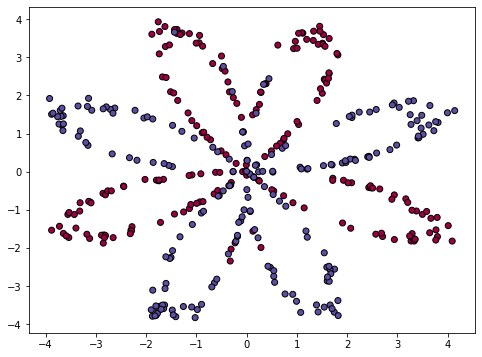

In [81]:
plt.figure(figsize=(8,6))
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), cmap=plt.cm.Spectral, edgecolor='black');

In [82]:
shape_X = X.shape
shape_Y = Y.shape
print ('The shape of X is: ' + str(shape_X))
print ('The shape of Y is: ' + str(shape_Y))

The shape of X is: (2, 400)
The shape of Y is: (1, 400)


## Simple Logistic Regression

In [83]:
clf = LogisticRegressionCV(cv=3)
clf.fit(X.T, Y.T.ravel())

LogisticRegressionCV(Cs=10, class_weight=None, cv=3, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='warn', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)

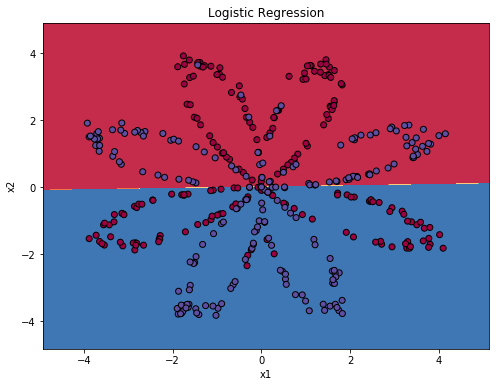

Accuracy of logistic regression: 45 % (percentage of correctly labelled datapoints)


In [107]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y, 'Logistic Regression')

LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

<b>Interpretation:</b> The dataset is not linearly separable, so logistic regression doesn't perform well.

## Neural Network

Logistic regression did not work well on the "flower dataset". You are going to train a Neural Network with a single hidden layer.

For one example $x^{(i)}$:
$$z^{[1] (i)} =  W^{[1]} x^{(i)} + b^{[1]}\tag{1}$$ 
$$a^{[1] (i)} = \tanh(z^{[1] (i)})\tag{2}$$
$$z^{[2] (i)} = W^{[2]} a^{[1] (i)} + b^{[2]}\tag{3}$$
$$\hat{y}^{(i)} = a^{[2] (i)} = \sigma(z^{ [2] (i)})\tag{4}$$
$$y^{(i)}_{prediction} = \begin{cases} 1 & \mbox{if } a^{[2](i)} > 0.5 \\ 0 & \mbox{otherwise } \end{cases}\tag{5}$$

Given the predictions on all the examples, you can also compute the cost $J$ as follows: 
$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large\left(\small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right)  \large  \right) \small \tag{6}$$

**Reminder**: The general methodology to build a Neural Network is to:
    1. Define the neural network structure ( # of input units,  # of hidden units, etc). 
    2. Initialize the model's parameters
    3. Loop:
        - Implement forward propagation
        - Compute loss
        - Implement backward propagation to get the gradients
        - Update parameters (gradient descent)

You often build helper functions to compute steps 1-3 and then merge them into one function we call `nn_model()`. Once you've built `nn_model()` and learnt the right parameters, you can make predictions on new data.

In [85]:
def layer_sizes(X, Y):
    n_x = X.shape[0] 
    n_h = 4
    n_y = Y.shape[0] 
    return (n_x, n_h, n_y)

In [87]:
def initialize_parameters(n_x, n_h, n_y):
    np.random.seed(2)
    W1 = np.random.randn(n_h, n_x) * 0.01
    b1 = np.zeros((n_h, 1))
    W2 = np.random.randn(n_y, n_h) * 0.01
    b2 = np.zeros((n_y,1))
    
    assert (W1.shape == (n_h, n_x))
    assert (b1.shape == (n_h, 1))
    assert (W2.shape == (n_y, n_h))
    assert (b2.shape == (n_y, 1))
    
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    
    return parameters

In [88]:
def forward_propagation(X, parameters):
    W1 = parameters["W1"]
    b1 = parameters["b1"]
    W2 = parameters["W2"]
    b2 = parameters["b2"]
    Z1 = np.dot(W1, X) + b1
    A1 =  np.tanh(Z1)
    Z2 = np.dot(W2, A1) + b2
    A2 = sigmoid(Z2)
    
    assert(A2.shape == (1, X.shape[1]))
    cache = {"Z1": Z1, "A1": A1, "Z2": Z2, "A2": A2}
    return A2, cache

### The Cost Function

You can compute the cost function as follows:

$$J = - \frac{1}{m} \sum\limits_{i = 0}^{m} \large{(} \small y^{(i)}\log\left(a^{[2] (i)}\right) + (1-y^{(i)})\log\left(1- a^{[2] (i)}\right) \large{)} \small\tag{13}$$

In [89]:
def compute_cost(A2, Y, parameters):
    m = Y.shape[1] 
    logprobs = Y*np.log(A2)+(1-Y)*np.log(1-A2)
    cost = -1/m*np.sum(logprobs)
    cost = np.squeeze(cost)
    assert(isinstance(cost, float))
    return cost

### Backwards Propagation

In [90]:
def backward_propagation(parameters, cache, X, Y):
    m = X.shape[1]
    W1 = parameters['W1']
    W2 = parameters['W2']
    A1 = cache['A1']
    A2 = cache['A2']
    dZ2 = A2-Y
    dW2 = 1/m*np.dot(dZ2,A1.T)
    db2 = 1/m*np.sum(dZ2, axis=1, keepdims=True)
    dZ1 = np.dot(W2.T,dZ2)*(1 - np.power(A1, 2))
    dW1 = 1/m*np.dot(dZ1,X.T)
    db1 = 1/m*np.sum(dZ1, axis=1, keepdims=True)
    grads = {"dW1": dW1, "db1": db1, "dW2": dW2, "db2": db2}
    return grads

### Gradient Descent

In [91]:
def update_parameters(parameters, grads, learning_rate = 1.2):
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']
    dW1 = grads['dW1']
    db1 = grads['db1']
    dW2 = grads['dW2']
    db2 = grads['db2']
    W1 = W1 - learning_rate*dW1
    b1 = b1 - learning_rate*db1
    W2 = W2 - learning_rate*dW2
    b2 = b2 - learning_rate*db2
    parameters = {"W1": W1, "b1": b1, "W2": W2, "b2": b2}
    return parameters

### The model

In [92]:
def nn_model(X, Y, n_h, num_iterations = 10000, print_cost=False):
    np.random.seed(3)
    n_x = layer_sizes(X, Y)[0]
    n_y = layer_sizes(X, Y)[2]

    parameters = initialize_parameters(n_x, n_h, n_y)
    W1 = parameters['W1']
    b1 = parameters['b1']
    W2 = parameters['W2']
    b2 = parameters['b2']

    for i in range(0, num_iterations):
        A2, cache = forward_propagation(X, parameters)
        cost = compute_cost(A2, Y, parameters)
        grads = backward_propagation(parameters, cache, X, Y)
        parameters = update_parameters(parameters, grads, learning_rate = 1.2)
        if print_cost and i % 1000 == 0:
            print ("Cost after iteration %i: %f" %(i, cost))
    return parameters

In [93]:
def predict(parameters, X):
    A2, cache = forward_propagation(X, parameters)
    predictions = (A2 > 0.5)
    return predictions

### Testing the Model

Cost after iteration 0: 0.693023
Cost after iteration 1000: 0.206361
Cost after iteration 2000: 0.196287
Cost after iteration 3000: 0.191138
Cost after iteration 4000: 0.187104
Cost after iteration 5000: 0.184586
Cost after iteration 6000: 0.182715
Cost after iteration 7000: 0.181123
Cost after iteration 8000: 0.179695
Cost after iteration 9000: 0.178397


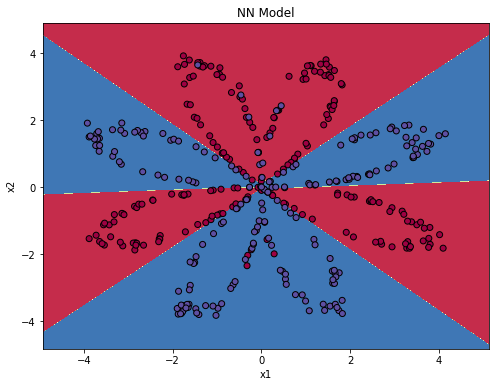

In [108]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y, 'NN Model')

In [97]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 94%


### Tunning the hidden layer size

<Figure size 1152x2304 with 0 Axes>

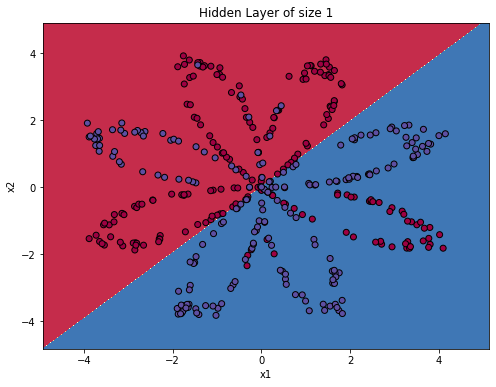

Accuracy for 1 hidden units: 72.75 %


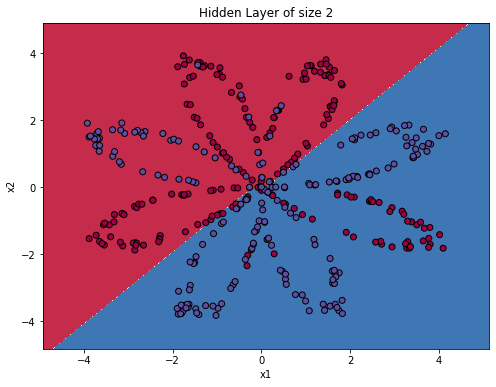

Accuracy for 2 hidden units: 70.75 %


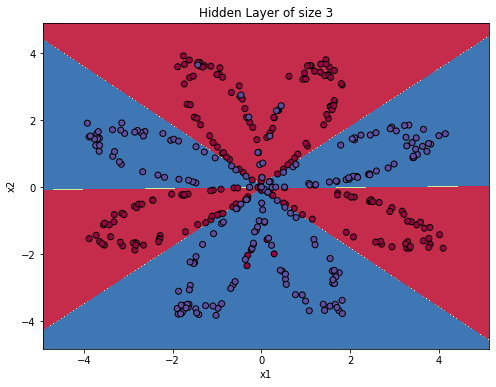

Accuracy for 3 hidden units: 94.25 %


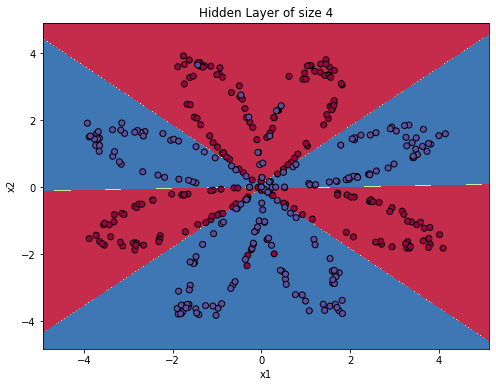

Accuracy for 4 hidden units: 93.75 %


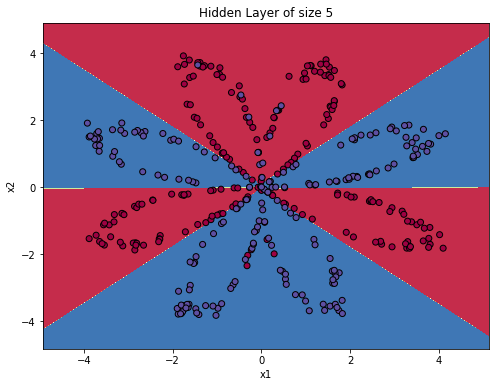

Accuracy for 5 hidden units: 93.0 %


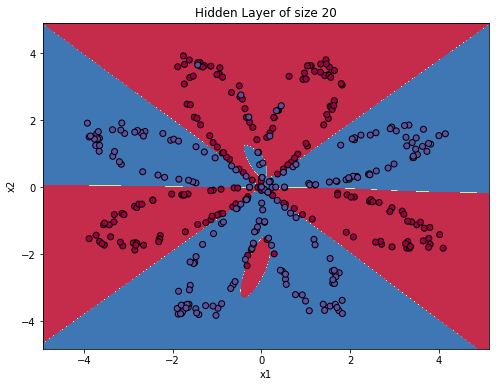

Accuracy for 20 hidden units: 96.0 %


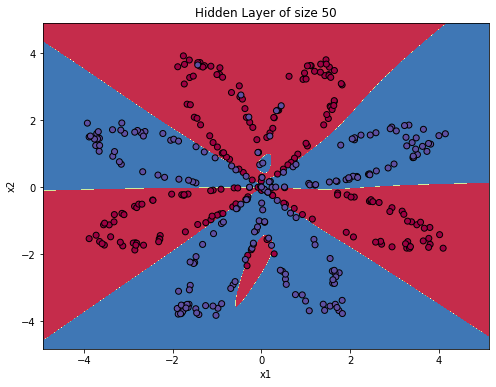

Accuracy for 50 hidden units: 95.5 %


In [109]:
plt.figure(figsize=(16, 32))
hidden_layer_sizes = [1, 2, 3, 4, 5, 20, 50]
for i, n_h in enumerate(hidden_layer_sizes):
    title = 'Hidden Layer of size %d' % n_h
    parameters = nn_model(X, Y, n_h, num_iterations = 5000)
    plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y, title=title)
    predictions = predict(parameters, X)
    accuracy = float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100)
    print ("Accuracy for {} hidden units: {} %".format(n_h, accuracy))

## Results in other Datasets

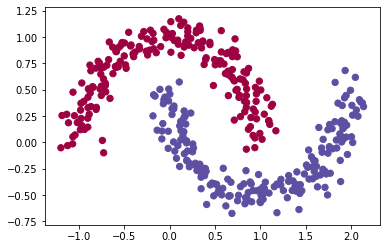

In [126]:
X, Y = sklearn.datasets.make_moons(n_samples=400, shuffle=True, noise=0.1)
X, Y = X.T, Y.reshape(1, Y.shape[0])
plt.scatter(X[0, :], X[1, :], c=Y.ravel(), s=40, cmap=plt.cm.Spectral);

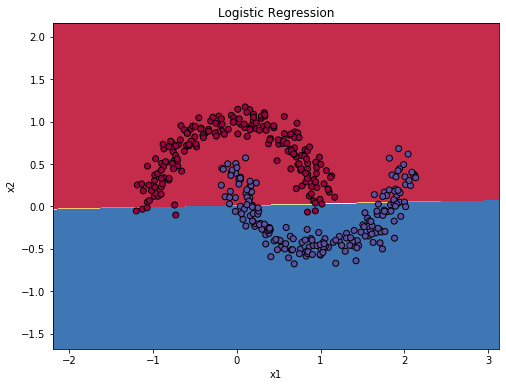

Accuracy of logistic regression: 82 % (percentage of correctly labelled datapoints)


In [127]:
plot_decision_boundary(lambda x: clf.predict(x), X, Y, 'Logistic Regression')

LR_predictions = clf.predict(X.T)
print ('Accuracy of logistic regression: %d ' % float((np.dot(Y,LR_predictions) + np.dot(1-Y,1-LR_predictions))/float(Y.size)*100) +
       '% ' + "(percentage of correctly labelled datapoints)")

Cost after iteration 0: 0.692995
Cost after iteration 1000: 0.255328
Cost after iteration 2000: 0.006788
Cost after iteration 3000: 0.002602
Cost after iteration 4000: 0.001600
Cost after iteration 5000: 0.001152
Cost after iteration 6000: 0.000898
Cost after iteration 7000: 0.000734
Cost after iteration 8000: 0.000620
Cost after iteration 9000: 0.000537


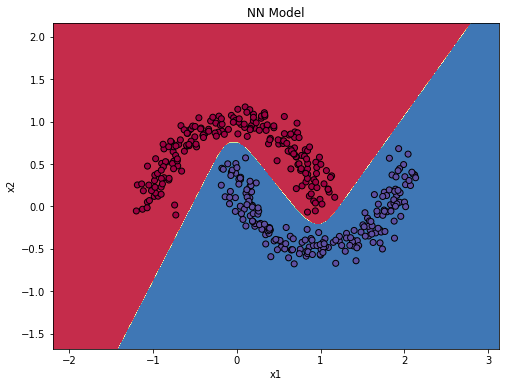

In [128]:
parameters = nn_model(X, Y, n_h = 4, num_iterations = 10000, print_cost=True)
plot_decision_boundary(lambda x: predict(parameters, x.T), X, Y, 'NN Model')

In [129]:
predictions = predict(parameters, X)
print ('Accuracy: %d' % float((np.dot(Y,predictions.T) + np.dot(1-Y,1-predictions.T))/float(Y.size)*100) + '%')

Accuracy: 100%
